In [28]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import re

Populating the interactive namespace from numpy and matplotlib


In [29]:
#Reading in Monthly Stock data
df = pd.read_csv('Stock Data.csv')
df[:5]

,PERMNO,Date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,...,CFACSHR,ALTPRC,SPREAD,ALTPRCDT,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
0,10001,20081231,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,1.0,8.260,NaN,20081231.0,0.150418,0.022154,0.019087,0.042176,0.037024,0.007822
1,10001,20090130,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,1.0,8.502,NaN,20090130.0,0.029298,-0.077315,-0.078709,-0.024042,-0.025384,-0.085657
2,10001,20090227,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,1.0,8.940,NaN,20090227.0,0.051517,-0.100271,-0.103457,-0.107667,-0.109769,-0.109931
3,10001,20090331,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,1.0,8.180,NaN,20090331.0,-0.085011,0.086748,0.083489,0.107474,0.104391,0.085405
4,10001,20090430,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,1.0,8.500,NaN,20090430.0,0.03912,0.109352,0.107516,0.192762,0.190929,0.093925


In [30]:
#Converting =Date column to datetime object
df['Date'] = pd.to_datetime(df['Date'], format= '%Y%m%d')

In [31]:
#Creating columns for Adjusted Shares, Adjusted Price and Market Cap
df['AdjShr'] = df['SHROUT'] * df['CFACSHR']
df['AdjPrc'] = df['PRC'] / df['CFACPR']
df['MktCap'] = df['AdjShr'] * df['AdjPrc']
df= df.drop_duplicates(subset = ['PERMNO',"Date", "MktCap"])
df[:5]

,PERMNO,Date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,...,ALTPRCDT,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn,AdjShr,AdjPrc,MktCap
0,10001,2008-12-31,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,20081231.0,0.150418,0.022154,0.019087,0.042176,0.037024,0.007822,4297.0,8.260,35493.220
1,10001,2009-01-30,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,20090130.0,0.029298,-0.077315,-0.078709,-0.024042,-0.025384,-0.085657,4297.0,8.502,36533.094
2,10001,2009-02-27,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,20090227.0,0.051517,-0.100271,-0.103457,-0.107667,-0.109769,-0.109931,4297.0,8.940,38415.180
3,10001,2009-03-31,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,20090331.0,-0.085011,0.086748,0.083489,0.107474,0.104391,0.085405,4300.0,8.180,35174.000
4,10001,2009-04-30,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,20090430.0,0.03912,0.109352,0.107516,0.192762,0.190929,0.093925,4300.0,8.500,36550.000


In [32]:
#Using a mask to filter out common shares (SHRCD first digit = 1)
mask = df['SHRCD']<=19
cmmn_stock = df[mask]
len(cmmn_stock)#[:5]
cmmn_stock[:5]

,PERMNO,Date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,...,ALTPRCDT,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn,AdjShr,AdjPrc,MktCap
0,10001,2008-12-31,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,20081231.0,0.150418,0.022154,0.019087,0.042176,0.037024,0.007822,4297.0,8.260,35493.220
1,10001,2009-01-30,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,20090130.0,0.029298,-0.077315,-0.078709,-0.024042,-0.025384,-0.085657,4297.0,8.502,36533.094
2,10001,2009-02-27,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,20090227.0,0.051517,-0.100271,-0.103457,-0.107667,-0.109769,-0.109931,4297.0,8.940,38415.180
3,10001,2009-03-31,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,20090331.0,-0.085011,0.086748,0.083489,0.107474,0.104391,0.085405,4300.0,8.180,35174.000
4,10001,2009-04-30,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,20090430.0,0.03912,0.109352,0.107516,0.192762,0.190929,0.093925,4300.0,8.500,36550.000


In [33]:
#Creating Year, Month and Quarter columns from Date column
cmmn_stock['Year'] = pd.DatetimeIndex(cmmn_stock['Date']).year
cmmn_stock['Month'] = pd.DatetimeIndex(cmmn_stock['Date']).month
cmmn_stock['Quarter'] = pd.DatetimeIndex(cmmn_stock['Date']).quarter
cmmn_stock[:10]

C:\Users\Joseph\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Joseph\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Joseph\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,PERMNO,Date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,...,vwretx,ewretd,ewretx,sprtrn,AdjShr,AdjPrc,MktCap,Year,Month,Quarter
0,10001,2008-12-31,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,0.019087,0.042176,0.037024,0.007822,4297.0,8.2600,35493.2200,2008,12,4
1,10001,2009-01-30,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,-0.078709,-0.024042,-0.025384,-0.085657,4297.0,8.5020,36533.0940,2009,1,1
2,10001,2009-02-27,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,-0.103457,-0.107667,-0.109769,-0.109931,4297.0,8.9400,38415.1800,2009,2,1
3,10001,2009-03-31,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,0.083489,0.107474,0.104391,0.085405,4300.0,8.1800,35174.0000,2009,3,1
4,10001,2009-04-30,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,0.107516,0.192762,0.190929,0.093925,4300.0,8.5000,36550.0000,2009,4,2
5,10001,2009-05-29,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,0.065124,0.102330,0.100210,0.053081,4354.0,8.4800,36921.9200,2009,5,2
6,10001,2009-06-30,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,-0.005042,0.023921,0.021352,0.000196,4301.0,8.5999,36988.1699,2009,6,2
7,10001,2009-07-31,NaN,11.0,3.0,4920,29274A20,EWST,ENERGY WEST INC,NaN,...,0.080331,0.085217,0.083763,0.074142,4301.0,8.1500,35053.1500,2009,7,3
8,10001,2009-08-31,20091217.0,11.0,3.0,4920,29269V10,EGAS,ENERGY INC,NaN,...,0.029310,0.056864,0.055310,0.033560,4302.0,8.5400,36739.0800,2009,8,3
9,10001,2009-09-30,NaN,11.0,3.0,4920,29269V10,EGAS,ENERGY INC,NaN,...,0.043576,0.071255,0.069383,0.035723,4303.0,8.5999,37005.3697,2009,9,3


In [34]:
type(cmmn_stock["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
cmmn_stock['Date'] = pd.to_datetime(cmmn_stock['Date'])

C:\Users\Joseph\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
return_list = []

In [37]:
#function to rebalance
def getReturn(y,qtr):
    
    x = y[y['Quarter'] == qtr]

    x['weight'] = x['AdjPrc'] / sum(x['AdjPrc'])
    x['wt_price'] = x['weight'] * x['AdjPrc']
    
    a=sum(x['wt_price'])
    return_list.append(a)



In [38]:
mask2008 = cmmn_stock['Date']== '2008-12-31'
mask2009 = cmmn_stock['Date']== '2009-12-31'
mask2010 = cmmn_stock['Date']== '2010-12-31'
mask2011 = cmmn_stock['Date']== '2011-12-30'
mask2012 = cmmn_stock['Date']== '2012-12-31'
mask2013 = cmmn_stock['Date']== '2013-12-31'
mask2014 = cmmn_stock['Date']== '2014-12-31'
mask2015 = cmmn_stock['Date']== '2015-12-31'
mask2016 = cmmn_stock['Date']== '2016-12-30'
mask2017 = cmmn_stock['Date']== '2017-12-29'
mask2018 = cmmn_stock['Date']== '2018-12-31'


In [39]:
#q4_08 - q3_09
#choose 30 largest market cap companies and compose a adjusted price weighted price, then sum to get index 

SP500_2009 = cmmn_stock[mask2008].sort_values(by = 'MktCap', ascending = False )[:30]
SP500_2009['weight'] = SP500_2009['AdjPrc'] / sum(SP500_2009['AdjPrc'])
SP500_2009['wt_price'] = SP500_2009['weight'] * SP500_2009['AdjPrc']
sum(SP500_2009['wt_price'])

q4_08 = sum(SP500_2009['wt_price'])
return_list.append(q4_08)


Stock_2009 = cmmn_stock[cmmn_stock['PERMNO'].isin(SP500_2009['PERMNO'])& cmmn_stock['Month'].isin([3,6,9]) & cmmn_stock['Year'].isin([2009])]

for x in [1,2,3]:

    getReturn(Stock_2009, x)

#q4_09 - q3_10
SP500_2010 = cmmn_stock[mask2009].sort_values(by = 'MktCap', ascending = False )[:30]
SP500_2010['weight'] = SP500_2010['AdjPrc'] / sum(SP500_2010['AdjPrc'])
SP500_2010['wt_price'] = SP500_2010['weight'] * SP500_2010['AdjPrc']
sum(SP500_2010['wt_price'])

q4_09 = sum(SP500_2010['wt_price'])
return_list.append(q4_09)


Stock_2010 = cmmn_stock[cmmn_stock['PERMNO'].isin(SP500_2010['PERMNO'])& cmmn_stock['Month'].isin([3,6,9]) & cmmn_stock['Year'].isin([2010])]

for x in [1,2,3]:

    getReturn(Stock_2010, x)

#q4_10 - q3_11
SP500_2011 = cmmn_stock[mask2010].sort_values(by = 'MktCap', ascending = False )[:30]
SP500_2011['weight'] = SP500_2011['AdjPrc'] / sum(SP500_2011['AdjPrc'])
SP500_2011['wt_price'] = SP500_2011['weight'] * SP500_2011['AdjPrc']
sum(SP500_2011['wt_price'])

q4_10 = sum(SP500_2011['wt_price'])
return_list.append(q4_10)


Stock_2011 = cmmn_stock[cmmn_stock['PERMNO'].isin(SP500_2011['PERMNO'])& cmmn_stock['Month'].isin([3,6,9]) & cmmn_stock['Year'].isin([2011])]

for x in [1,2,3]:

    getReturn(Stock_2011, x)


#q4_11 - q3_12
SP500_2012 = cmmn_stock[mask2011].sort_values(by = 'MktCap', ascending = False )[:30]
SP500_2012['weight'] = SP500_2012['AdjPrc'] / sum(SP500_2012['AdjPrc'])
SP500_2012['wt_price'] = SP500_2012['weight'] * SP500_2012['AdjPrc']
sum(SP500_2012['wt_price'])

q4_11 = sum(SP500_2012['wt_price'])
return_list.append(q4_11)


Stock_2012 = cmmn_stock[cmmn_stock['PERMNO'].isin(SP500_2012['PERMNO'])& cmmn_stock['Month'].isin([3,6,9]) & cmmn_stock['Year'].isin([2012])]

for x in [1,2,3]:

    getReturn(Stock_2012, x)


    
#q4_12 - q3_13

SP500_2013 = cmmn_stock[mask2012].sort_values(by = 'MktCap', ascending = False )[:30]
SP500_2013['weight'] = SP500_2013['AdjPrc'] / sum(SP500_2013['AdjPrc'])
SP500_2013['wt_price'] = SP500_2013['weight'] * SP500_2013['AdjPrc']
sum(SP500_2013['wt_price'])

q4_12 = sum(SP500_2013['wt_price'])
return_list.append(q4_12)


Stock_2013 = cmmn_stock[cmmn_stock['PERMNO'].isin(SP500_2013['PERMNO'])& cmmn_stock['Month'].isin([3,6,9]) & cmmn_stock['Year'].isin([2013])]

for x in [1,2,3]:

    getReturn(Stock_2013, x)


#q4_13 - q3_14

SP500_2014 = cmmn_stock[mask2013].sort_values(by = 'MktCap', ascending = False )[:30]
SP500_2014['weight'] = SP500_2014['AdjPrc'] / sum(SP500_2014['AdjPrc'])
SP500_2014['wt_price'] = SP500_2014['weight'] * SP500_2014['AdjPrc']
sum(SP500_2014['wt_price'])

q4_13 = sum(SP500_2014['wt_price'])
return_list.append(q4_13)


Stock_2014 = cmmn_stock[cmmn_stock['PERMNO'].isin(SP500_2014['PERMNO'])& cmmn_stock['Month'].isin([3,6,9]) & cmmn_stock['Year'].isin([2014])]

for x in [1,2,3]:

    getReturn(Stock_2014, x)

#q4_14 - q3_15

SP500_2015 = cmmn_stock[mask2014].sort_values(by = 'MktCap', ascending = False )[:30]
SP500_2015['weight'] = SP500_2015['AdjPrc'] / sum(SP500_2015['AdjPrc'])
SP500_2015['wt_price'] = SP500_2015['weight'] * SP500_2015['AdjPrc']
sum(SP500_2015['wt_price'])

q4_14 = sum(SP500_2015['wt_price'])
return_list.append(q4_14)


Stock_2015 = cmmn_stock[cmmn_stock['PERMNO'].isin(SP500_2015['PERMNO'])& cmmn_stock['Month'].isin([3,6,9]) & cmmn_stock['Year'].isin([2015])]

for x in [1,2,3]:

    getReturn(Stock_2015, x)
    
    
#q4_15 - q3_16
SP500_2016 = cmmn_stock[mask2015].sort_values(by = 'MktCap', ascending = False )[:30]
SP500_2016['weight'] = SP500_2016['AdjPrc'] / sum(SP500_2016['AdjPrc'])
SP500_2016['wt_price'] = SP500_2016['weight'] * SP500_2016['AdjPrc']
sum(SP500_2016['wt_price'])

q4_15 = sum(SP500_2016['wt_price'])
return_list.append(q4_15)


Stock_2016 = cmmn_stock[cmmn_stock['PERMNO'].isin(SP500_2016['PERMNO'])& cmmn_stock['Month'].isin([3,6,9]) & cmmn_stock['Year'].isin([2016])]

for x in [1,2,3]:

    getReturn(Stock_2016, x)

    
#q4_16 - q3_17

SP500_2017 = cmmn_stock[mask2016].sort_values(by = 'MktCap', ascending = False )[:30]
SP500_2017['weight'] = SP500_2017['AdjPrc'] / sum(SP500_2017['AdjPrc'])
SP500_2017['wt_price'] = SP500_2017['weight'] * SP500_2017['AdjPrc']
sum(SP500_2017['wt_price'])

q4_16 = sum(SP500_2017['wt_price'])
return_list.append(q4_16)


Stock_2017 = cmmn_stock[cmmn_stock['PERMNO'].isin(SP500_2017['PERMNO'])& cmmn_stock['Month'].isin([3,6,9]) & cmmn_stock['Year'].isin([2017])]

for x in [1,2,3]:

    getReturn(Stock_2017, x)
    
    
#q4_17 - q3_18

SP500_2018 = cmmn_stock[mask2017].sort_values(by = 'MktCap', ascending = False )[:30]
SP500_2018['weight'] = SP500_2018['AdjPrc'] / sum(SP500_2018['AdjPrc'])
SP500_2018['wt_price'] = SP500_2018['weight'] * SP500_2018['AdjPrc']
sum(SP500_2018['wt_price'])

q4_17 = sum(SP500_2018['wt_price'])
return_list.append(q4_17)

Stock_2018 = cmmn_stock[cmmn_stock['PERMNO'].isin(SP500_2018['PERMNO'])& cmmn_stock['Month'].isin([3,6,9]) & cmmn_stock['Year'].isin([2018])]

for x in [1,2,3]:

    getReturn(Stock_2018, x)

#q4_18

SP500_2019 = cmmn_stock[mask2018].sort_values(by = 'MktCap', ascending = False )[:30]
SP500_2019['weight'] = SP500_2019['AdjPrc'] / sum(SP500_2019['AdjPrc'])
SP500_2019['wt_price'] = SP500_2019['weight'] * SP500_2019['AdjPrc']
sum(SP500_2019['wt_price'])

q4_18 = sum(SP500_2019['wt_price'])
return_list.append(q4_18)

C:\Users\Joseph\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Joseph\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [40]:
len(return_list)

41

In [41]:
#transform lists into dataframe
price_df = pd.DataFrame(return_list)

In [42]:
#ideally we also have to change the row index to q4 2008, q1 2009, etc, but I didn't know how to 
price_df.rename(columns={0:'price'}, inplace = True)


In [43]:
price_df

,price
0,95423.776890
1,85726.669644
2,88919.293460
3,99811.123113
4,97555.742904
5,120139.634357
6,118565.643734
7,122897.043433
8,118771.392471
9,123564.541441


In [44]:
#calculate return by doing the following calculation:
# return = price / 2008 q4 price (first row) - 1
#I hardcoded 1138.301854 but if it could be done with a function it would be great

price_df['return'] = (price_df['price'] / 95423.776890) -1

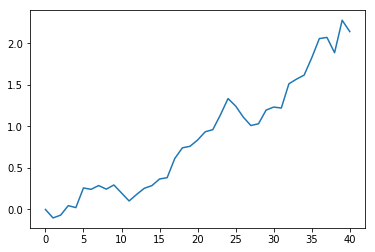

In [52]:
price_df['return'].plot()

In [68]:
actual_returns = pd.read_csv('Actual_Returns.csv')

In [69]:
actual_returns = actual_returns[:41]

In [70]:
actual_returns['Date'] = pd.to_datetime(actual_returns['Date'])
actual_returns['SPY'] = actual_returns['SPY'].convert_objects(convert_numeric=True)
actual_returns['VFINX'] = actual_returns['VFINX'].convert_objects(convert_numeric=True)
actual_returns['DJIA'] = actual_returns['DJIA'].convert_objects(convert_numeric=True)
actual_returns['SWTSX'] = actual_returns['SWTSX'].convert_objects(convert_numeric=True)
#actual_returns = actual_returns.set_index('Date')

C:\Users\Joseph\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\Joseph\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Joseph\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after r

In [71]:
all_returns = actual_returns.join(price_df)
all_returns = all_returns.set_index('Date')

In [80]:
all_returns.to_csv("all stocks.csv")

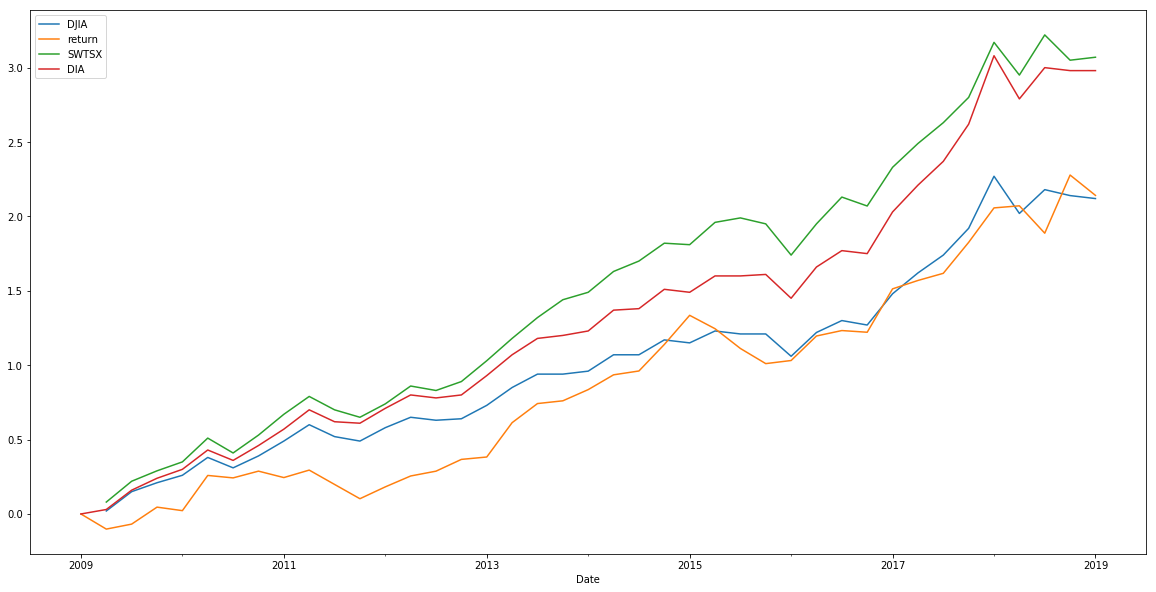

In [74]:
all_returns.plot(y = ['DJIA',"return","SWTSX",'DIA'],figsize=(20,10))
